<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Corrección seguimiento 1  </center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Felipe Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

# INTRODUCCIÓN.

**Introducción a la electromiografía y características de la señal**

La electromiografía (EMG) es una técnica ampliamente para evaluar la actividad eléctrica de los músculos. Esta técnica proporciona información valiosa sobre el funcionamiento del sistema neuromuscular, permitiendo diagnosticar trastornos neuromusculares, evaluar la función muscular y monitorear la actividad muscular durante diversas actividades y terapias.

La señal de electromiografía se genera por la actividad eléctrica de las unidades motoras en el músculo durante la contracción. Estas señales pueden ser registradas utilizando electrodos colocados en la superficie de la piel (electromiografía de superficie) o mediante agujas insertadas directamente en el músculo (electromiografía de aguja). La señal de EMG es una representación de la actividad eléctrica de las fibras musculares, que varía en amplitud y frecuencia según la fuerza y el tipo de contracción muscular.

Las características principales de la señal de EMG incluyen su amplitud, duración, frecuencia y forma de onda. La amplitud de la señal refleja la cantidad de actividad eléctrica generada por las fibras musculares, mientras que la duración indica la temporalidad de la actividad muscular. La frecuencia de la señal está relacionada con la velocidad de contracción y la fatiga muscular. La forma de onda de la señal puede proporcionar información adicional sobre la sincronización y coordinación de la actividad muscular.

**Descripción del operador de TKEO y su interpretación.**

El operador de Teager-Kaiser Energy Operator (TKEO) es una técnica utilizada para analizar las señales de electromiografía y resaltar características relevantes relacionadas con la actividad muscular. Este operador calcula una medida de la energía local en la señal, enfocándose en los cambios instantáneos en la amplitud de la señal. El resultado del operador TKEO resalta los cambios instantáneos en la señal, lo que puede ser útil para detectar eventos de interés relacionados con la actividad muscular, como contracciones musculares rápidas o cambios bruscos en la actividad eléctrica. La interpretación de la señal resultante del TKEO se centra en la identificación de picos y valles que pueden corresponder a eventos musculares específicos, como la activación o desactivación de unidades motoras.

In [ ]:
import os
import pandas as pd
#importación de librerias
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import scipy.io as sio;
import numpy as np;
import glob
import pandas as pd
import math
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro , levene, mannwhitneyu

*IMPORTAMOS TODOS LOS DATOS Y CREAMOS UN DATAFRAME*

In [ ]:
data_folder = 'EMG_data_for_gestures-master'  # Carpeta principal

all_data = []  # Lista para almacenar los datos de todos los sujetos

# Iterar sobre cada carpeta numerada
for subject_folder in os.listdir(data_folder):
    subject_path = os.path.join(data_folder, subject_folder)
    if os.path.isdir(subject_path):
        # Iterar sobre los archivos de datos en cada carpeta de sujeto
        for data_file in os.listdir(subject_path):
            if data_file.endswith('.txt') and data_file.startswith('1_raw'):
                file_path = os.path.join(subject_path, data_file)
                # Leer el archivo de datos y convertirlo en un DataFrame de Pandas
                data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
                data.columns = ['tiempo'] + [f'canal_{i}' for i in range(1, 9)] + ['clase']
                data['sujeto'] = int(subject_folder)
                all_data.append(data)

# Concatenar todos los DataFrames en uno solo
all_data = pd.concat(all_data, ignore_index=True)

# Imprimir el DataFrame original
all_data

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\2251218311.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\2251218311.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\2251218311.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1)
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\2251218311.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv i

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195967,54833,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195968,54834,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195969,54835,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36


# **1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).**

In [ ]:
def tkeo(signal):
    tkeo_signal = signal**2 - np.roll(signal, 1) * np.roll(signal, -1)
    return tkeo_signal

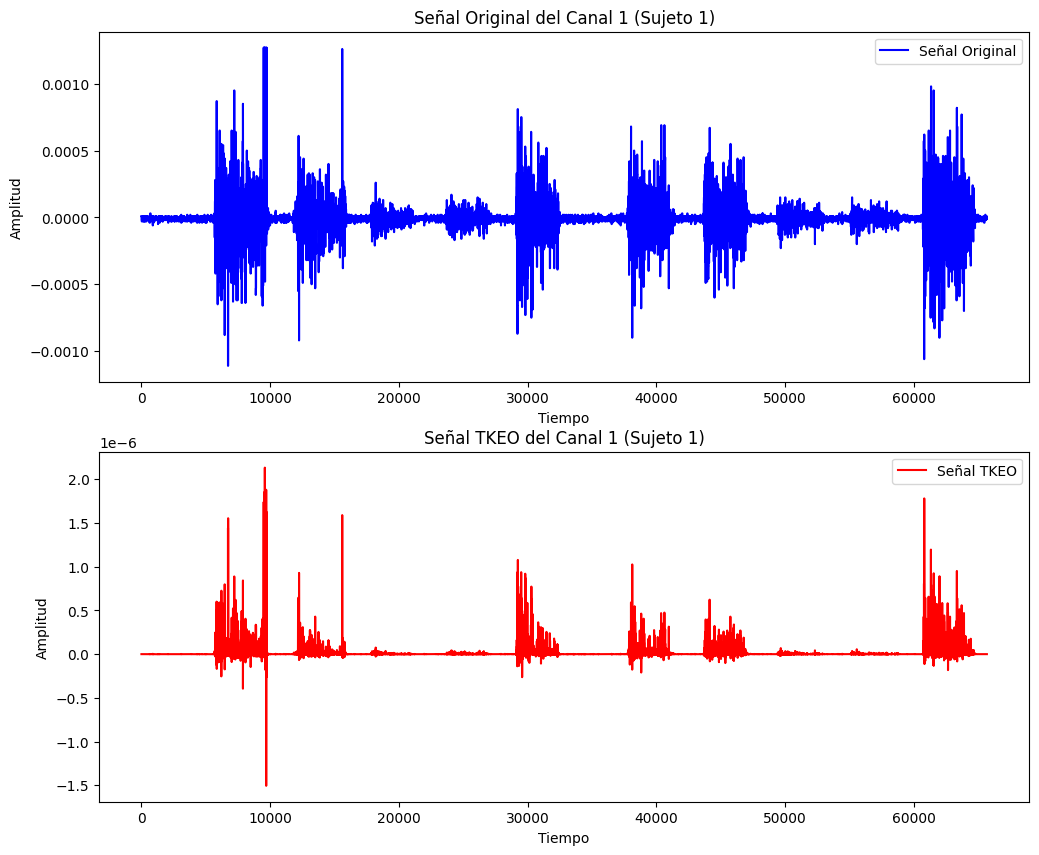

In [ ]:
# Filtrar los datos para obtener solo las filas donde la columna 'sujeto' es igual a 1
datos_filtrados = all_data[all_data['sujeto'] == 1]

# Aplicar TKEO al canal seleccionado (filtrado)
tkeo_canal = tkeo(datos_filtrados['canal_1'])

# Visualizar el resultado
plt.figure(figsize=(12, 10))
# Subgráfica para la señal original
plt.subplot(211)
plt.plot(datos_filtrados['tiempo'], datos_filtrados['canal_1'], label='Señal Original', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Original del Canal 1 (Sujeto 1)')
plt.legend()
# Subgráfica para la señal TKEO
plt.subplot(212)
plt.plot(datos_filtrados['tiempo'], tkeo_canal, label='Señal TKEO', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal TKEO del Canal 1 (Sujeto 1)')
plt.legend()
# Mostrar la figura
plt.show()

La señal electromiográfica (EMG) original exhibe una forma de onda compleja y con amplitud variable, caracterizada por la presencia de picos prominentes que indican la activación de unidades motoras y una frecuencia variable que refleja la contracción muscular. Esta señal contiene varios componentes, incluyendo actividad muscular, ruido y artefactos, y puede ser analizada tanto en el dominio de la frecuencia como en el dominio del tiempo, lo que permite identificar diferentes componentes y estudiar su evolución a lo largo del tiempo.

Forma de onda: Compleja (Por el ruido ) y con amplitud variable
Picos prominentes: Presentes, representando la activación de unidades motoras.
Frecuencia: Variable, reflejando la contracción muscular.
Análisis de frecuencia: Permite identificar diferentes componentes (baja, media y alta frecuencia).
Análisis de tiempo: Permite estudiar la evolución de la señal en el tiempo

Por otro lado, al aplicar el operador Teager-Kaiser Energy Operator (TKEO) a la señal original, se observa una transformación significativa. La señal resultante del TKEO presenta una forma de onda más suave y con amplitud más constante, con picos prominentes atenuados. Además, la frecuencia de la señal TKEO es más baja que la de la señal original. En términos de componentes, la actividad muscular se conserva, mientras que el ruido y los artefactos se reducen. El análisis comparativo revela que el TKEO suaviza la señal, facilitando la identificación de diferentes componentes y la medición de parámetros como la amplitud y la potencia media. Además, atenúa los picos prominentes al eliminar las componentes de alta frecuencia, lo que hace que la señal sea más adecuada para el análisis de la actividad muscular a largo plazo.

Forma de onda: Más suave y con amplitud más constante.
Picos prominentes: Atenuados con respecto a la original.
Frecuencia: Más baja con respecto a la original.
Análisis de frecuencia: Se atenúan las componentes de alta frecuencia.
Análisis de tiempo: Se facilita la identificación de los diferentes componentes.

# **2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.**

In [ ]:
# Filtrar los datos para obtener solo las filas donde la columna 'sujeto' es igual a 1
tkeo_canal = all_data[all_data['sujeto'] == 1]

# Mostrar el DataFrame filtrado
tkeo_canal

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
63191,65657,-0.00001,0.00001,-0.00005,-0.00001,-0.00003,-0.00001,-0.00001,-0.00004,0.0,1
63192,65658,-0.00001,0.00001,-0.00005,-0.00001,-0.00003,-0.00001,-0.00001,-0.00004,0.0,1
63193,65659,-0.00001,0.00001,-0.00005,-0.00001,-0.00003,-0.00001,-0.00001,-0.00004,0.0,1
63194,65660,-0.00001,0.00001,-0.00005,-0.00001,-0.00003,-0.00001,-0.00001,-0.00004,0.0,1


In [ ]:
def apply_tkeo(data):
    tkeo_data = data.copy()
    for col in tkeo_data.columns[1:-2]:  # Excluir la columna 'tiempo','clase' y 'sujeto'
        tkeo_data[col] = tkeo(tkeo_data[col])
    return tkeo_data

In [ ]:
# Aplicando el operador TKEO a los datos del sujeto 1
tkeo_canales = tkeo_canal[tkeo_canal['sujeto'] == 1]
df_tkeo= apply_tkeo(tkeo_canales)
df_tkeo

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,2.000000e-10,6.000000e-10,-4.000000e-10,6.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e-10,0.0,1
1,5,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0.0,1
2,6,2.000000e-10,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0.0,1
3,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
4,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
63191,65657,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
63192,65658,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
63193,65659,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
63194,65660,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1


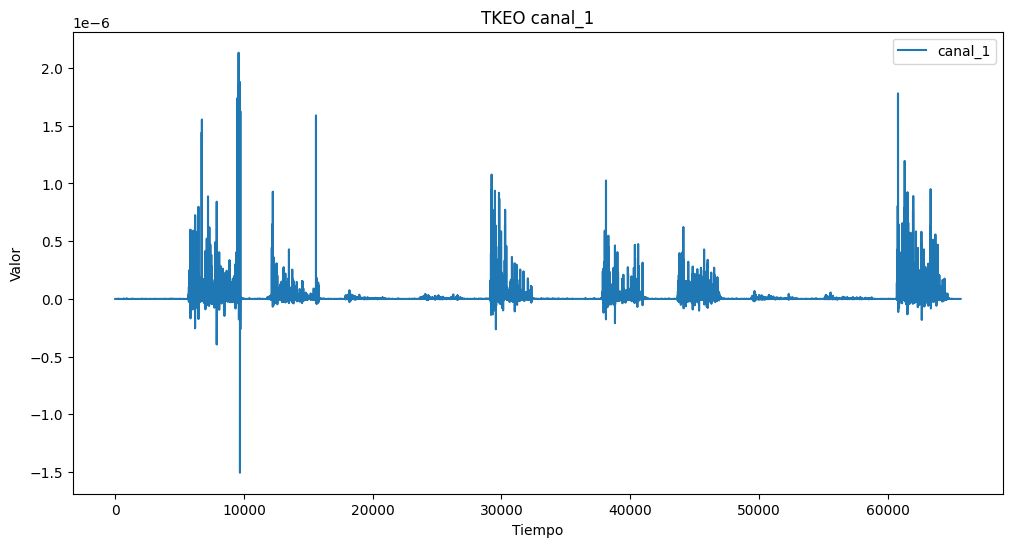

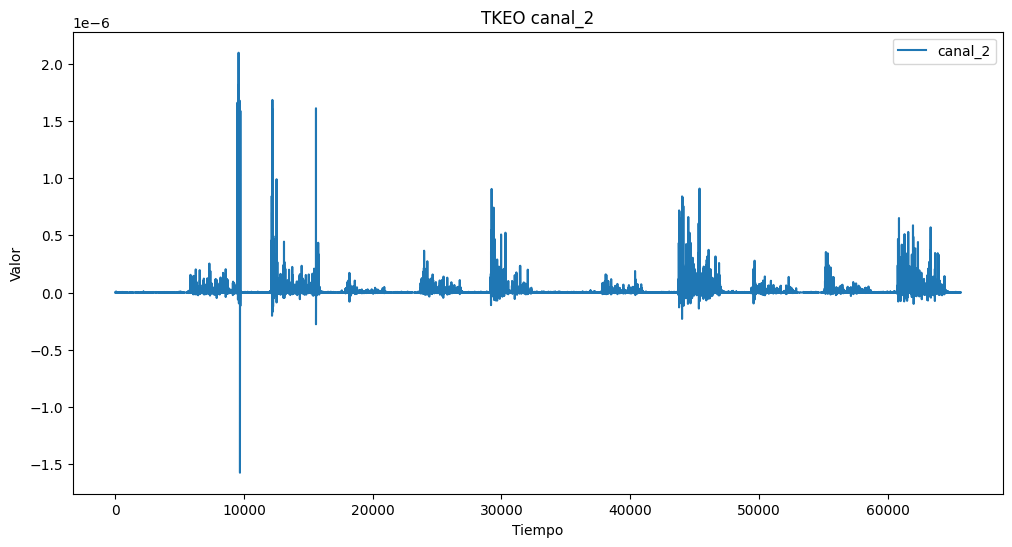

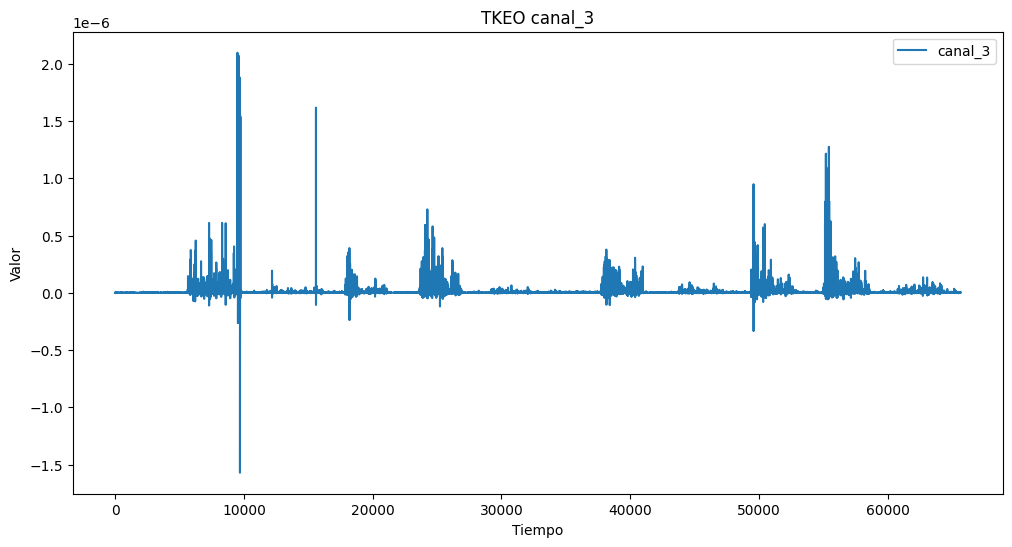

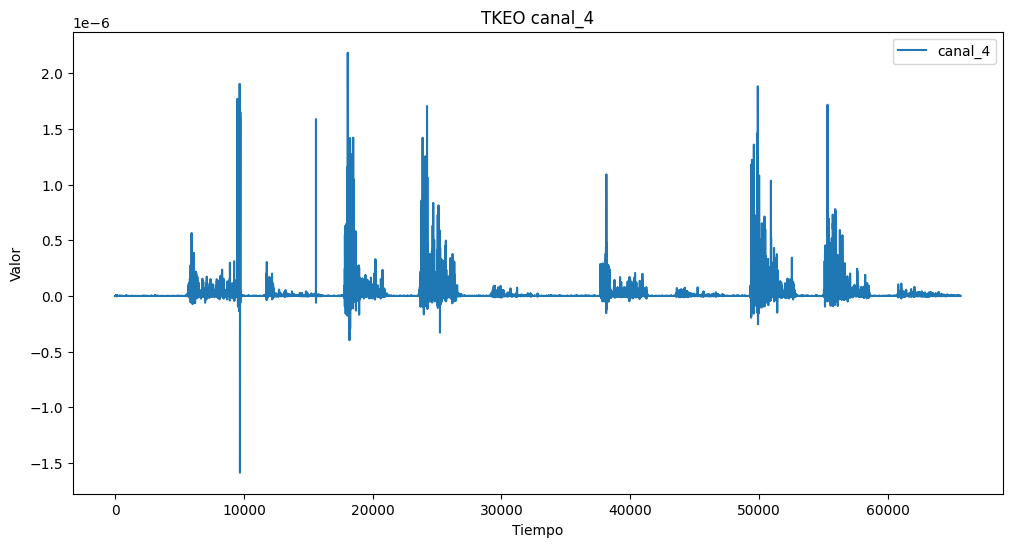

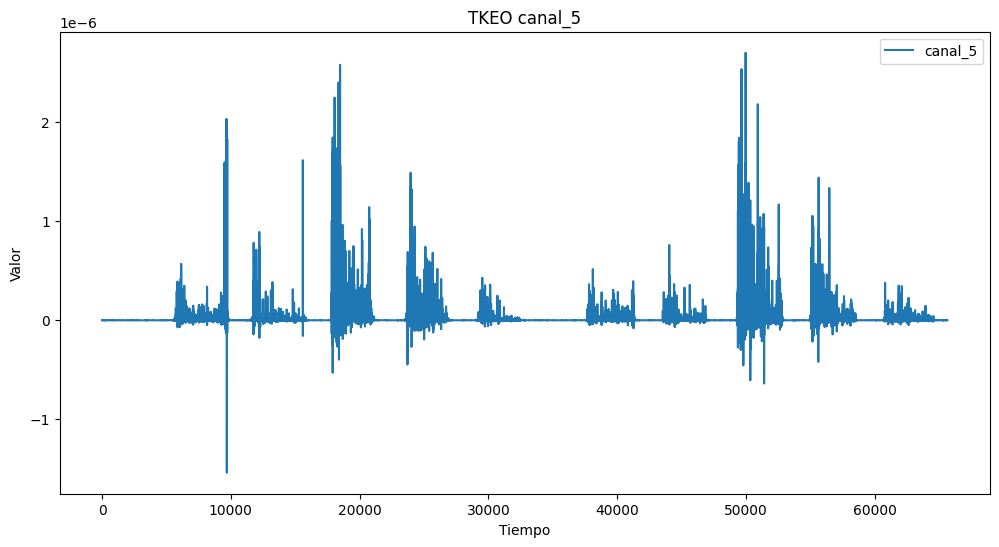

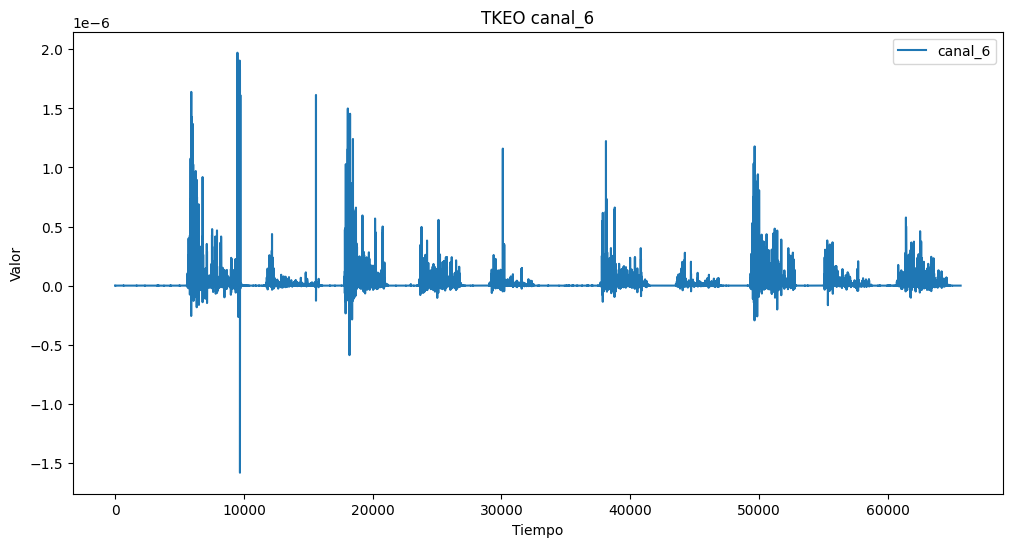

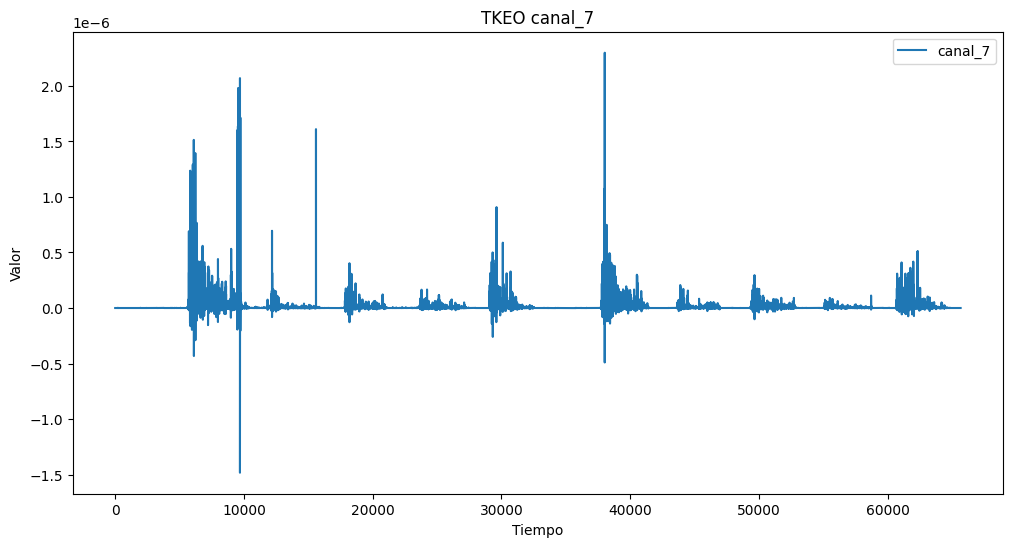

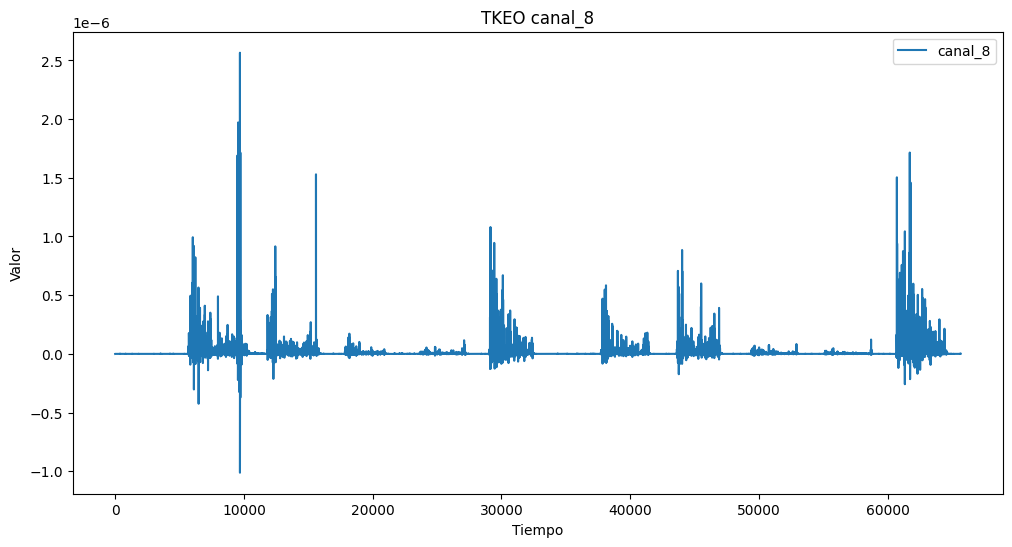

In [ ]:
# Visualizar todas las columnas del DataFrame (excepto 'sujeto' y 'tiempo')
for column in df_tkeo.columns:
    if column not in ['sujeto', 'tiempo', 'clase']:
        # Crear una nueva figura
        plt.figure(figsize=(12, 6))

        # Trazar la gráfica de la columna actual
        plt.plot(df_tkeo['tiempo'], df_tkeo[column], label=column)

        # Configurar título y etiquetas
        plt.title(f'TKEO {column}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor')
        plt.legend()

        # Mostrar la gráfica
        plt.show()

A pesar de que al aplicar el operador TKEO a cada canal se obtuvo una forma de onda más suave y con amplitud más constante, con picos prominentes atenuados, ourren algunos cambios al aplicar el operador TKEO a cada canal. Si bien son cambios muy pequeños, estos se pueden generar debido a la naturaleza de los datos originales (presencia de ruido y artefactos en la señal de origen). Pero en terminos generales, el operador TKEO atenúa los picos prominentes al eliminar las componentes de alta frecuencia, lo que hace que la señal sea más adecuada para su análisis posterior.

# 3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal:
*   RMS
*   Varianza
*   Mean Absolute Value
*   Mean Absolute Value Slope
*   Slope Sign Changes
*   Wave form length
*   Zero Crossing









In [ ]:
def rms(signal):
    return np.sqrt(np.mean(signal**2))

def variance(signal):
    return np.var(signal)

def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

def mean_absolute_value_slope(signal):
    return np.mean(np.diff(np.abs(signal)))

def slope_sign_changes(signal):
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def wave_form_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def zero_crossings(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)


In [ ]:
# Ordenar el DataFrame por la columna 'clase'
df_ordenado = df_tkeo.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in df_tkeo.columns[1:9]:
        canal = grupo[columna]

        # Aplicar las características a cada canal
        caracteristicas = {
            'sujeto': grupo['sujeto'].iloc[0],  # Tomamos el valor del sujeto del primer elemento del grupo
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }

        # Añadir los resultados a la lista
        resultados.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados = pd.DataFrame(resultados)

# El DataFrame df_resultados contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados




,sujeto,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,1,0.0,canal_1,4.949585e-08,2.436138e-15,4.238583e-09,-4.846018e-15,10530,2.797810e-04,7450
1,1,0.0,canal_2,4.706363e-08,2.202478e-15,3.994667e-09,-1.453805e-14,10988,2.590144e-04,7793
2,1,0.0,canal_3,4.426181e-08,1.948746e-15,3.620346e-09,-9.692036e-15,11156,2.290748e-04,7905
3,1,0.0,canal_4,6.139595e-08,3.745329e-15,5.574918e-09,-1.453805e-14,10834,3.583364e-04,7687
4,1,0.0,canal_5,8.004805e-08,6.354351e-15,8.303998e-09,-6.934760e-27,10545,5.244446e-04,7523
5,1,0.0,canal_6,5.663040e-08,3.183569e-15,5.622887e-09,1.657528e-26,10322,3.645666e-04,7366
6,1,0.0,canal_7,4.976025e-08,2.462417e-15,4.307988e-09,6.355527e-26,10292,2.775766e-04,7319
7,1,0.0,canal_8,5.159534e-08,2.646441e-15,4.592775e-09,-7.269027e-15,10430,3.057369e-04,7431
8,1,1.0,canal_1,2.036246e-10,4.021190e-20,4.505291e-11,9.576383e-29,876,3.030000e-07,615
9,1,1.0,canal_2,6.175412e-10,3.669635e-19,1.462698e-10,-2.646203e-14,978,9.175000e-07,689


# **4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3.**

*APLICAR TKEO A TODOS LOS DATOS*

In [ ]:
df_tkeotot = apply_tkeo(all_data)
df_tkeotot

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,5.000000e-10,-6.000000e-10,-7.000000e-10,-9.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
1,5,2.000000e-10,6.000000e-10,3.000000e-10,9.000000e-10,0.000000e+00,-1.000000e-10,0.000000e+00,2.000000e-10,0.0,1
2,6,2.000000e-10,3.000000e-10,6.000000e-10,0.000000e+00,1.000000e-10,2.000000e-10,1.000000e-10,2.000000e-10,0.0,1
3,7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
4,8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195967,54833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195968,54834,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36
2195969,54835,0.000000e+00,6.000000e-10,0.000000e+00,1.120000e-08,-2.000000e-10,0.000000e+00,2.000000e-10,0.000000e+00,0.0,36


*APLICAR CARACTERISTICAS A TODOS LOS DATOS*

In [ ]:
# Ordenar el DataFrame por la columna 'clase'
df_ordenado3 = df_tkeotot.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados3 = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado3.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in df_ordenado3.columns[1:9]:
        canal = grupo[columna]

        # Aplicar las características a cada canal
        caracteristicas = {
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }

        # Añadir los resultados a la lista
        resultados3.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados3 = pd.DataFrame(resultados3)

# El DataFrame df_resultados ahora contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados3  # Muestra las primeras filas del DataFrame de resultados

,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,0.0,canal_1,5.710464e-08,3.242738e-15,4.859281e-09,-3.477272e-16,368512,0.010781,262528
1,0.0,canal_2,4.094726e-08,1.670220e-15,2.890346e-09,-4.172726e-16,377401,0.006367,269128
2,0.0,canal_3,3.971319e-08,1.568380e-15,3.345339e-09,-4.868180e-16,383963,0.007397,274333
3,0.0,canal_4,8.003825e-08,6.341809e-15,9.169875e-09,-6.259089e-16,385656,0.020164,276693
4,0.0,canal_5,9.697832e-08,9.276585e-15,1.303510e-08,-3.397775e-27,386361,0.028619,278647
...,...,...,...,...,...,...,...,...,...
59,7.0,canal_4,2.151547e-08,4.480675e-16,4.325808e-09,4.319176e-26,2190,0.000046,1599
60,7.0,canal_5,1.167581e-07,1.303634e-14,2.784305e-08,1.307426e-25,2228,0.000319,1633
61,7.0,canal_6,1.080506e-07,1.127701e-14,2.284388e-08,-3.922279e-26,2249,0.000272,1645
62,7.0,canal_7,7.108336e-09,4.878080e-17,1.519247e-09,1.108978e-27,2163,0.000018,1576


# **5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales.**

In [ ]:
#Datos originales
all_data

,tiempo,canal_1,canal_2,canal_3,canal_4,canal_5,canal_6,canal_7,canal_8,clase,sujeto
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2195966,54832,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195967,54833,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195968,54834,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36
2195969,54835,-0.00004,-0.00006,-0.00008,-0.00014,-0.00002,0.00000,-0.00002,-0.00001,0.0,36


In [ ]:
# Ordenar el DataFrame por la columna 'clase'
df_ordenado2 = all_data.sort_values(by='clase')

# Diccionario para almacenar los resultados
resultados2 = []

# Iterar sobre los grupos definidos por los valores de la columna 'clase'
for clase, grupo in df_ordenado2.groupby('clase'):
    # Iterar sobre las columnas de interés (de la 2 a la 9)
    for columna in all_data.columns[1:9]:
        canal = grupo[columna]

        # Aplicar las características a cada canal
        caracteristicas = {
            'clase': clase,
            'canal': columna,
            'rms': rms(canal),
            'variance': variance(canal),
            'mean_absolute_value': mean_absolute_value(canal),
            'mean_absolute_value_slope': mean_absolute_value_slope(canal),
            'slope_sign_changes': slope_sign_changes(canal),
            'wave_form_length': wave_form_length(canal),
            'zero_crossings': zero_crossings(canal)
        }

        # Añadir los resultados a la lista
        resultados2.append(caracteristicas)

# Convertir la lista de diccionarios en un DataFrame
df_resultados2 = pd.DataFrame(resultados2)

# El DataFrame df_resultados ahora contiene los resultados de las características para cada grupo de la columna 'clase', cada canal y sujeto.
df_resultados2  # Muestra las primeras filas del DataFrame de resultados


,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings
0,0.0,canal_1,0.000147,2.145317e-08,0.000066,4.797408e-24,460388,32.81996,192333
1,0.0,canal_2,0.000112,1.238486e-08,0.000053,6.954543e-12,470555,26.63471,195603
2,0.0,canal_3,0.000120,1.432750e-08,0.000065,-5.681017e-24,478332,32.74392,196883
3,0.0,canal_4,0.000202,4.087466e-08,0.000105,-1.390909e-11,479059,52.92738,192431
4,0.0,canal_5,0.000242,5.855764e-08,0.000134,4.062245e-24,477509,66.05438,186178
...,...,...,...,...,...,...,...,...,...
59,7.0,canal_4,0.000130,1.682793e-08,0.000095,2.822467e-09,2816,0.28266,1161
60,7.0,canal_5,0.000360,1.297535e-07,0.000281,-9.031894e-08,2833,0.79228,1058
61,7.0,canal_6,0.000329,1.084446e-07,0.000233,2.822467e-09,2842,0.70952,1127
62,7.0,canal_7,0.000083,6.788920e-09,0.000063,8.467401e-09,2772,0.18290,1083


# **6. Almacene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las caracteristicas proviene de una señal con TKEO o sin TKEO.**

In [ ]:
# Concatenar los dos DataFrames
df_final = pd.concat([df_resultados2, df_resultados3], ignore_index=True)
# Agregar la columna 'TKEO' a df_resultados2 y llenarla con 0
df_resultados2['TKEO'] = 0

# Agregar la columna 'TKEO' a df_resultados3 y llenarla con 1
df_resultados3['TKEO'] = 1
# Mostrar el DataFrame resultante
df_final

,clase,canal,rms,variance,mean_absolute_value,mean_absolute_value_slope,slope_sign_changes,wave_form_length,zero_crossings,TKEO
0,0.0,canal_1,1.466615e-04,2.145317e-08,6.563766e-05,4.797408e-24,460388,32.819960,192333,0
1,0.0,canal_2,1.116611e-04,1.238486e-08,5.343258e-05,6.954543e-12,470555,26.634710,195603,0
2,0.0,canal_3,1.200613e-04,1.432750e-08,6.468873e-05,-5.681017e-24,478332,32.743920,196883,0
3,0.0,canal_4,2.024073e-04,4.087466e-08,1.054561e-04,-1.390909e-11,479059,52.927380,192431,0
4,0.0,canal_5,2.424090e-04,5.855764e-08,1.337284e-04,4.062245e-24,477509,66.054380,186178,0
...,...,...,...,...,...,...,...,...,...,...
123,7.0,canal_4,2.151547e-08,4.480675e-16,4.325808e-09,4.319176e-26,2190,0.000046,1599,1
124,7.0,canal_5,1.167581e-07,1.303634e-14,2.784305e-08,1.307426e-25,2228,0.000319,1633,1
125,7.0,canal_6,1.080506e-07,1.127701e-14,2.284388e-08,-3.922279e-26,2249,0.000272,1645,1
126,7.0,canal_7,7.108336e-09,4.878080e-17,1.519247e-09,1.108978e-27,2163,0.000018,1576,1


# **7. Análisis exploratorio de los datos (Estadística descriptiva)**

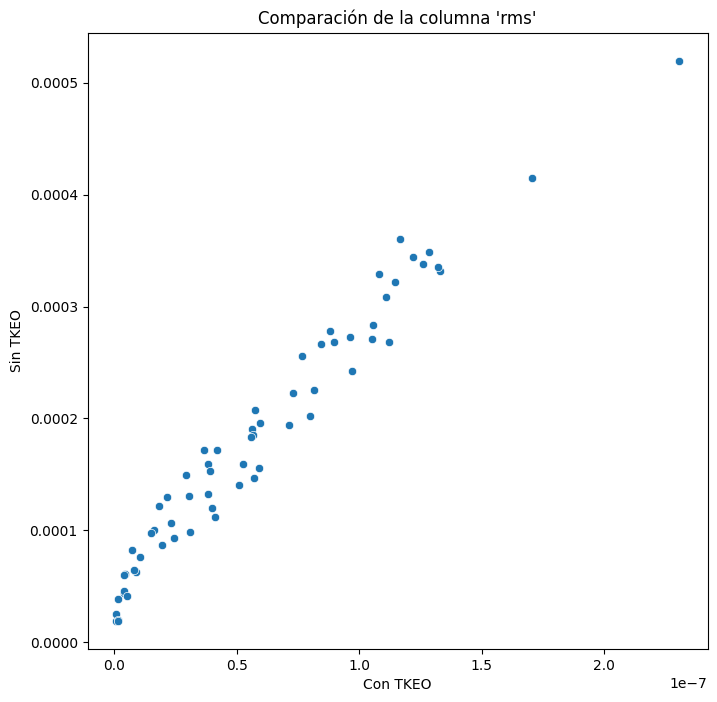

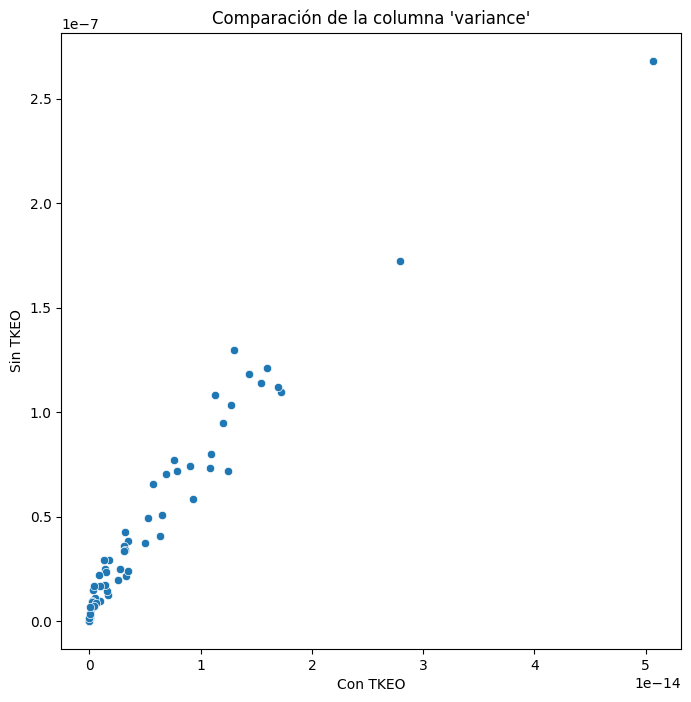

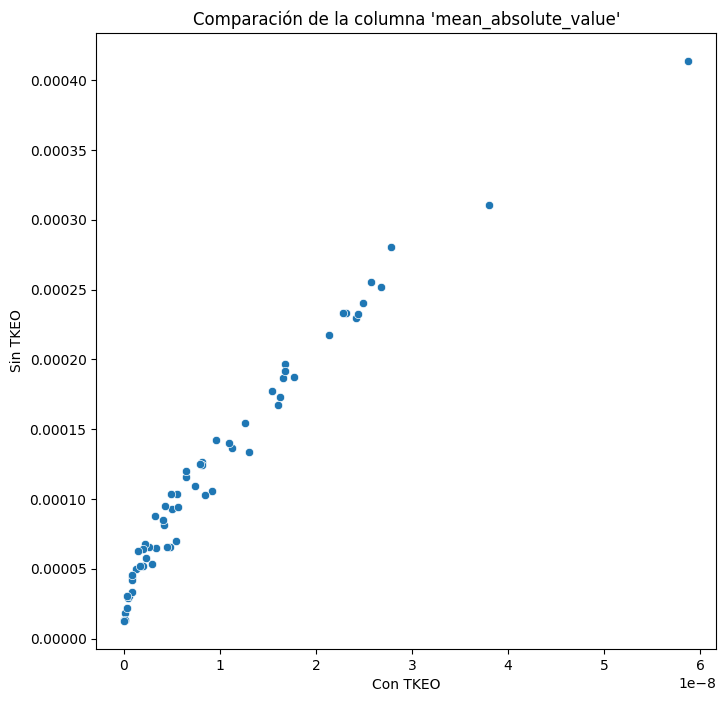

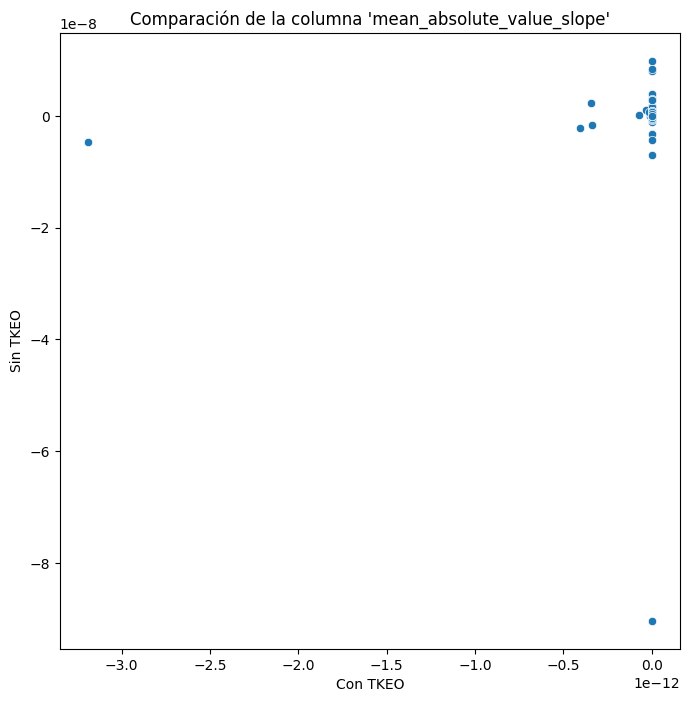

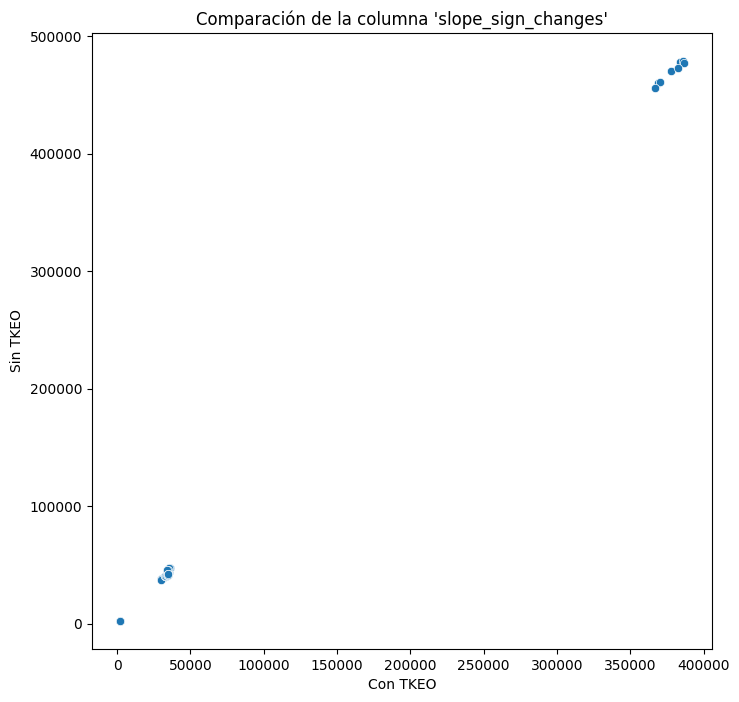

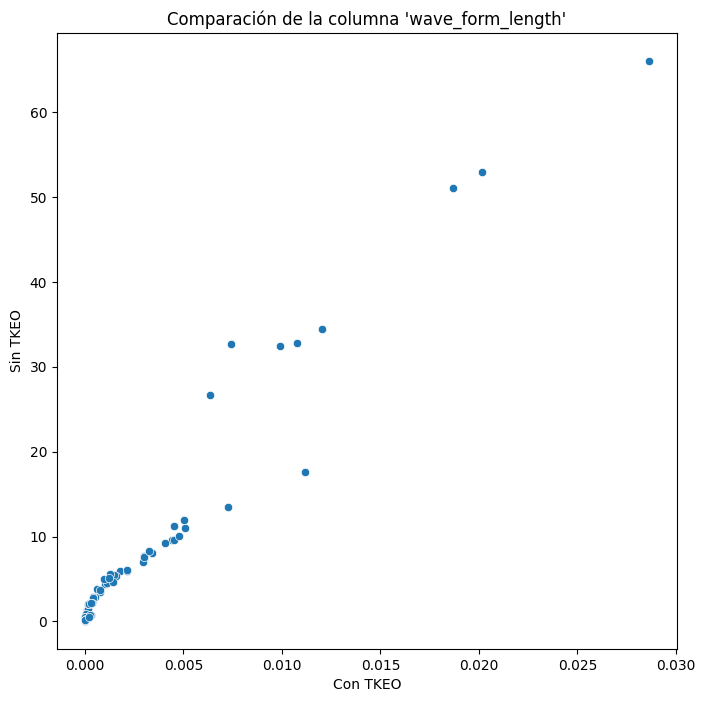

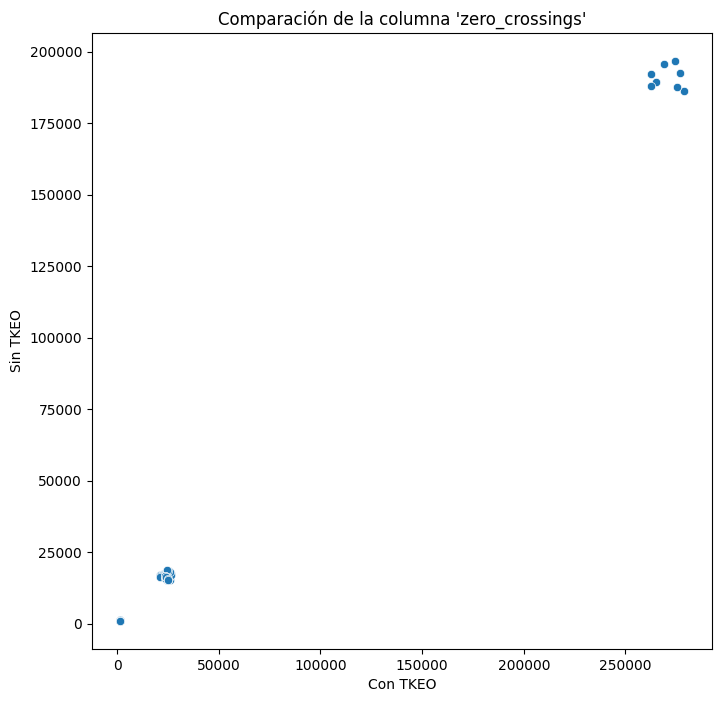

In [ ]:
def comparar_columnas(df2, df3):
    # Excluir las columnas 'clase' y 'TKEO' de ambos DataFrames
    df2_numerico = df2.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])
    df3_numerico = df3.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])

    # Comparar columnas entre df2_numerico y df3_numerico
    for columna in df2_numerico.columns:
        # Crear una nueva figura
        plt.figure(figsize=(8, 8))

        # Graficar los valores de df2_numerico[columna] contra df3_numerico[columna]
        sns.scatterplot(x=df3_numerico[columna], y=df2_numerico[columna])

        # Etiquetar los ejes
        plt.xlabel("Con TKEO")
        plt.ylabel("Sin TKEO")

        # Configurar el título
        plt.title(f"Comparación de la columna '{columna}'")

        # Mostrar el gráfico
        plt.show()
# Llamada a la función de gráficos de dispersión
comparar_columnas(df_resultados2, df_resultados3)



In [ ]:


# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
emg_tkeo= np.array(df_tkeo.iloc[:, 1:9])

emg_tkeo1 = np.array(tkeo_canales.iloc[:, 1:9])



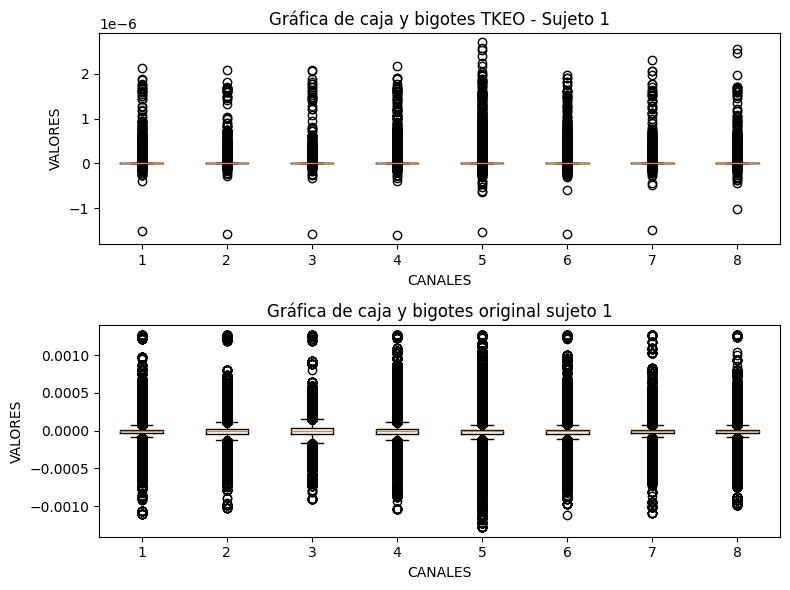

In [ ]:

# Crear una figura y ejes con subgráficos de 2 filas y 1 columna, y tamaño personalizado
fig, axs = plt.subplots(2, 1, figsize=(8, 6))  # Tamaño de la figura: 10 pulgadas de ancho, 8 pulgadas de alto

# Graficar el primer boxplot en el primer subgráfico
axs[0].boxplot(emg_tkeo)
axs[0].set_title('Gráfica de caja y bigotes TKEO - Sujeto 1')
axs[0].set_xlabel('CANALES')
axs[0].set_ylabel('VALORES')

# Graficar el segundo boxplot en el segundo subgráfico
axs[1].boxplot(emg_tkeo1)
axs[1].set_title('Gráfica de caja y bigotes original sujeto 1')
axs[1].set_xlabel('CANALES')
axs[1].set_ylabel('VALORES')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar los subgráficos
plt.show()


In [ ]:
# Seleccionar solo las columnas 1 a 8 de df_tkeo y convertirlas en un array
original = np.array(all_data.iloc[:, 1:9])

# Seleccionar solo las columnas 1 a 8 de all_data y convertirlas en un array
original_tkeo = np.array(df_tkeotot.iloc[:, 1:9])

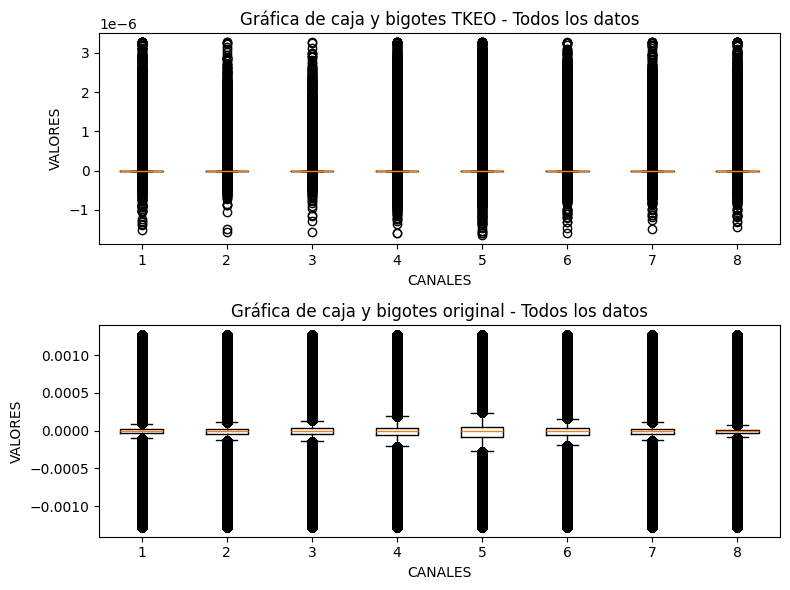

In [ ]:
# Crear una figura y ejes con subgráficos de 2 filas y 1 columna, y tamaño personalizado
fig, axs = plt.subplots(2, 1, figsize=(8, 6))  # Tamaño de la figura: 10 pulgadas de ancho, 8 pulgadas de alto

# Graficar el primer boxplot en el primer subgráfico
axs[0].boxplot(original_tkeo)
axs[0].set_title('Gráfica de caja y bigotes TKEO - Todos los datos')
axs[0].set_xlabel('CANALES')
axs[0].set_ylabel('VALORES')

# Graficar el segundo boxplot en el segundo subgráfico
axs[1].boxplot(original)
axs[1].set_title('Gráfica de caja y bigotes original - Todos los datos')
axs[1].set_xlabel('CANALES')
axs[1].set_ylabel('VALORES')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar los subgráficos
plt.show()


C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\963316939.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_resultados2[column], label='Señales originales', shade=True)
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\963316939.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_resultados3[column], label='Señales con TKEO', shade=True)


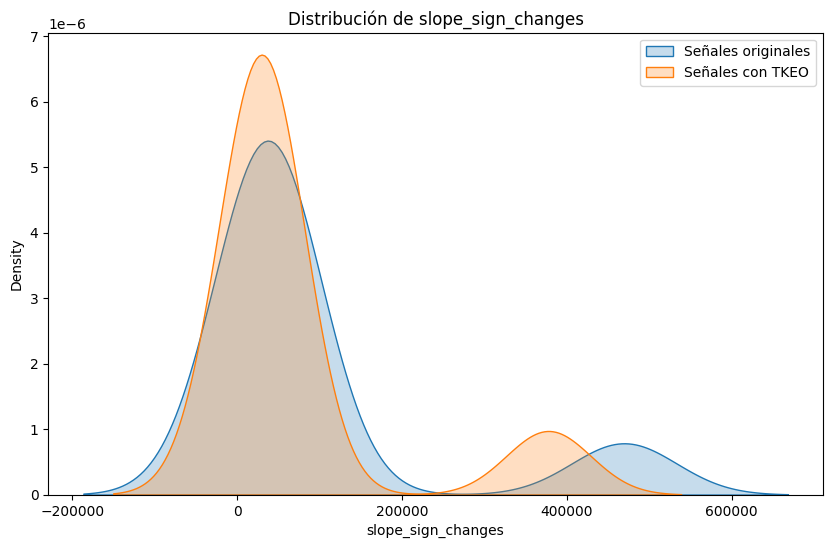

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\963316939.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_resultados2[column], label='Señales originales', shade=True)
C:\Users\DIEGO\AppData\Local\Temp\ipykernel_22708\963316939.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_resultados3[column], label='Señales con TKEO', shade=True)


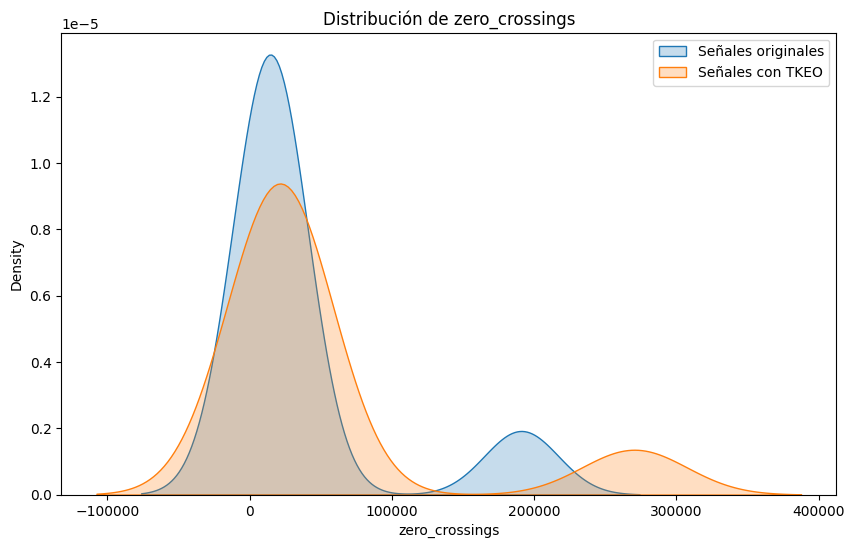

In [ ]:
# Comparar las distribuciones de las características entre df_resultados2 y df_resultados3
for column in df_resultados2.columns:
    if column in ['zero_crossings', 'slope_sign_changes']:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df_resultados2[column], label='Señales originales', shade=True)
        sns.kdeplot(df_resultados3[column], label='Señales con TKEO', shade=True)
        plt.title(f"Distribución de {column}")
        plt.legend()
        plt.show()


Los resultados del análisis de las características de los datos con y sin la aplicación del operador TKEO demuestran diferencias significativas en varias métricas clave.

- RMS: El valor del Root Mean Square (RMS) es menor en los datos sin TKEO en comparación con los datos con TKEO. Esto sugiere una reducción en la amplitud, probablemente debido a la eliminación de ruido y componentes de baja frecuencia por parte de TKEO.
- Zero Crossings: El aumento en el número de zero crossings después de aplicar TKEO indica un mayor número de transiciones entre valores de la señal. Esto podría deberse a la capacidad de TKEO para resaltar cambios rápidos en la señal.
- Waveform Length: El menor valor de Waveform Length en los datos con TKEO indica que la señal procesada tiene una forma de onda más corta en comparación con la señal original. Esto sugiere que TKEO suaviza la señal, reduciendo la longitud total de la forma de onda.
- Slope Sign Changes: Una disminución en el valor de Slope Sign Changes para los datos con TKEO indica una reducción en la cantidad de cambios de pendiente en la señal procesada. Esto podría ser un resultado de la atenuación del ruido por parte de TKEO, lo que suaviza la pendiente de la señal.
- Mean Absolute Value Slope: El menor valor de Mean Absolute Value Slope en los datos con TKEO indica una pendiente absoluta promedio más baja en la señal procesada. TKEO puede reducir las variaciones abruptas, resultando en una pendiente más suave.
- Mean Absolute Value: El menor valor de Mean Absolute Value para los datos con TKEO indica una amplitud promedio más baja. Esto podría deberse a la reducción de las amplitudes de las fluctuaciones de la señal original.
- Varianza: La menor varianza en los datos con TKEO indica una señal más uniforme y menos dispersa alrededor de su media, sugiriendo que TKEO reduce la variabilidad de la señal.

Por otro lado, el hecho de que los resultados de la caja de bigotes (boxplot) muestren una mayor uniformidad en los datos originales que en los datos procesados con TKEO sugiere que la aplicación de TKEO ha alterado la distribución de los datos, posiblemente introduciendo más variabilidad. Una mayor uniformidad en los datos originales significa que la distribución es más consistente y puede tener menos valores atípicos. Esto podría deberse a que los datos originales aún incluyen una cantidad significativa de ruido o componentes de baja frecuencia, lo que puede estar suavizando la distribución general. La mayor variabilidad observada en los datos procesados con TKEO podría estar relacionada con su capacidad para resaltar cambios rápidos y transiciones en la señal. Esto puede haber llevado a una mayor presencia de valores atípicos o variaciones más marcadas en la señal procesada.

Además, TKEO modificó la forma de onda de la señal, acentuando ciertas características y atenuando otras. Esto puede haber resultado en una mayor dispersión de los datos procesados en comparación con los datos originales.

En general, los gráficos de dispersión muestran patrones consistentes con estas observaciones, respaldando la conclusión de que TKEO tiene un impacto significativo en las características de la señal. Los resultados sugieren que la aplicación de TKEO resalta las características importantes de la señal mientras atenúa el ruido y las fluctuaciones no deseadas, resultando en una señal más limpia y con características alteradas.

# **PLANTEAMIENTO DE LAS HIPÓTESIS NULAS Y ALTERNATIVAS, SELECCIÓN DEL TIPO DE PRUEBA (PARAMÉTRICA O NO PARAMÉTRICA) (5%) Y DISCUSIÓN DE LOS RESULTADOS.**

- Hipótesis Nula (H0):
No hay diferencia significativa en las características entre los datos con TKEO (df_resultados3) y sin TKEO (df_resultados2).
Matemáticamente: μ(Con TKEO) = μ(Sin TKEO).

- Hipótesis Alternativa (H1):
Hay diferencia significativa en las características entre los datos con TKEO (df_resultados3) y sin TKEO (df_resultados2).
Matemáticamente: μ(Con TKEO) ≠ μ(Sin TKEO).

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

def dispersion(df2, df3):
    # Excluir las columnas 'clase' y 'TKEO' de ambos DataFrames
    df2_numerico = df2.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])
    df3_numerico = df3.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])

# Llamada a la función de gráficos de dispersión
dispersion(df_resultados2, df_resultados3)
# 2. Selección del tipo de prueba
def determinar_tipo_prueba(df2, df3):
    # Excluye las columnas 'clase' y 'TKEO'
    df2_numerico = df2.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])
    df3_numerico = df3.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])

    pruebas = {}

    for columna in df2_numerico.columns:
        # Verifica la normalidad de los datos
        _, p_value_normalidad_df2 = shapiro(df2_numerico[columna])
        _, p_value_normalidad_df3 = shapiro(df3_numerico[columna])

        normal_df2 = p_value_normalidad_df2 > 0.05
        normal_df3 = p_value_normalidad_df3 > 0.05

        # Verifica la homogeneidad de varianzas
        _, p_value_varianzas = levene(df2_numerico[columna], df3_numerico[columna])
        varianzas_iguales = p_value_varianzas > 0.05

        # Selecciona el tipo de prueba
        if normal_df2 and normal_df3 and varianzas_iguales:
            prueba = "t de Student"
        else:
            prueba = "Mann-Whitney U"

        pruebas[columna] = prueba

    return pruebas

# Determina el tipo de prueba para cada columna
pruebas = determinar_tipo_prueba(df_resultados2, df_resultados3)
print("Pruebas seleccionadas por columna:")
for columna, prueba in pruebas.items():
    print(f"{columna}: {prueba}")

# 3. Análisis de hipótesis
def realizar_pruebas(df2, df3, pruebas):
    df2_numerico = df2.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])
    df3_numerico = df3.drop(columns=['clase', 'TKEO']).select_dtypes(include=[np.number])

    resultados = []

    for columna, prueba in pruebas.items():
        if prueba == "t de Student":
            estadistico, p_value = ttest_ind(df2_numerico[columna], df3_numerico[columna])
        elif prueba == "Mann-Whitney U":
            estadistico, p_value = mannwhitneyu(df2_numerico[columna], df3_numerico[columna])

        resultados.append({
            'columna': columna,
            'prueba': prueba,
            'estadistico': estadistico,
            'p_value': p_value
        })

    return pd.DataFrame(resultados)

# Realiza las pruebas de hipótesis
resultados_pruebas = realizar_pruebas(df_resultados2, df_resultados3, pruebas)
print("\nResultados de las pruebas de hipótesis:")
print(resultados_pruebas)



Pruebas seleccionadas por columna:
rms: Mann-Whitney U
variance: Mann-Whitney U
mean_absolute_value: Mann-Whitney U
mean_absolute_value_slope: Mann-Whitney U
slope_sign_changes: Mann-Whitney U
wave_form_length: Mann-Whitney U
zero_crossings: Mann-Whitney U

Resultados de las pruebas de hipótesis:
                     columna          prueba  estadistico       p_value
0                        rms  Mann-Whitney U       4096.0  1.712830e-22
1                   variance  Mann-Whitney U       4096.0  1.712830e-22
2        mean_absolute_value  Mann-Whitney U       4096.0  1.712830e-22
3  mean_absolute_value_slope  Mann-Whitney U       2800.0  3.418448e-04
4         slope_sign_changes  Mann-Whitney U       3264.0  6.932036e-09
5           wave_form_length  Mann-Whitney U       4096.0  1.712830e-22
6             zero_crossings  Mann-Whitney U        832.0  6.932036e-09


Los resultados obtenidos indican que los datos no cumplen con los supuestos necesarios para realizar pruebas paramétricas como la prueba de t de Student, ya que al obtener un valor de p<0.05 en la prueba de Shapiro y en la prueba de Levene se descarta la prueba t de Student, debido a que los datos de las muestras deben seguir una distribución aproximadamente normal y las varianzas de las muestras deben ser aproximadamente iguales. Es por esto que todas las columnas requieren una prueba de Mann-Whitney U (una prueba no paramétrica). Al obtener un valor p<0.05 en la prueba de Mann-Whitney indica que SE RECHAZA la hipótesis nula y se acepta la hipótesis alternativa, por lo tanto, existe una diferencia significativa entre los datos con y sin TKEO.
Todas las columnas han mostrado valores p extremadamente bajos, por lo que podemos concluir que hay diferencias significativas entre los datos con y sin TKEO en todas las características evaluadas.
Esto sugiere que la aplicación de TKEO tiene un efecto significativo en todas las características consideradas.

# **CONCLUSIONES:**

- La extracción de señales electromiográficas (EMG) es fundamental para comprender la actividad muscular y detectar posibles anomalías neuromusculares. al combinar la información obtenida de la señal EEG con un optimo de procesamiento la señal, se puede obtener una comprensión más completa de la función muscular, lo que es crucial para el diagnóstico y tratamiento de trastornos neuromusculares.

- El procesamiento de señales desempeña un papel clave en la comprensión de la actividad muscular, ya que permite extraer características relevantes de la señal EMG y facilitar su comprensión permitiendo analizar su comportamiento en el tiempo y en el dominio de la frecuencia. Esto permite la identificación de patrones musculares específicos y proporciona información valiosa para evaluar la función muscular y detectar posibles anomalías.

- El operador Teager-Kaiser Energy Operator (TKEO) simplifica el análisis de señales EMG al suavizar o atenuar la forma de onda y reducir el ruido y los artefactos. Al atenuar los picos manteniendo la actividad muscular relevante, el TKEO facilita la interpretacion y manipulacion de nuestra señal de interes, lo que agiliza el proceso de análisis y aumenta la eficacia de las aplicaciones relacionadas con la electromiografía.

- Los resultados de las pruebas de hipótesis indican que se rechaza la hipótesis nula, y por lo tanto, existe una diferencia significativa entre los datos con y sin TKEO en todas las características analizadas (rms, variance, mean_absolute_value, mean_absolute_value_slope, slope_sign_changes, wave_form_length y zero_crossings). Esto sugiere que la aplicación del operador TKEO altera de forma sustancial las propiedades de los datos, destacando su efectividad en la transformación de señales y su potencial utilidad en aplicaciones prácticas como el análisis de señales biomédicas, audio o vibraciones.

Estos hallazgos tienen importantes implicaciones para la interpretación de las señales EMG y sugieren que el TKEO puede ser una herramienta útil para resaltar ciertas características de interés en las señales, lo que podría facilitar la detección de patrones específicos o la extracción de características relevantes para aplicaciones de diagnóstico o control de prótesis, entre otros usos en el campo de la electromiografía




